## log-posterior of two-dimensional parameters
Using Bayes-formula. 
We wisualise the posterior of the means of a Mixture of Gaussians with Gaussian prior using Bayes' formula. We take the example from
https://www.ics.uci.edu/~welling/publications/papers/stoclangevin_v6.pdf


In [1]:
from functools import partial
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# dataset
m = 200
theta1, theta2 = 0, 1      

Text(0.5, 1.0, 'historam of data')

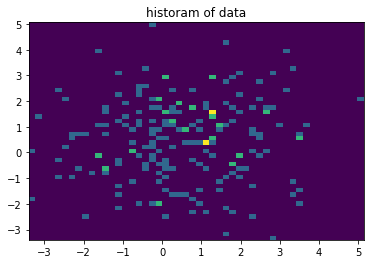

In [3]:
sigma_x = np.sqrt(2)
u1 = np.random.rand(m)
u2 = np.random.rand(m)
z1 = np.random.randn(m)
z2 = np.random.randn(m)
x1, x2 = np.zeros_like(u1), np.zeros_like(u1)
x1[np.where(u1<=0.5)] = theta1 + sigma_x * z1[np.where(u1<=0.5)]
x2[np.where(u2<=0.5)] = theta1 + sigma_x * z2[np.where(u2<=0.5)]
x1[np.where(u1>0.5)] = theta1 + theta2 + sigma_x * z1[np.where(u1>0.5)]
x2[np.where(u2>0.5)] = theta1 + theta2 + sigma_x * z2[np.where(u2>0.5)]
data_x = np.stack([x1,x2], axis=1)
plt.hist2d(data_x[:,0], data_x[:,1], bins=50)
plt.title("historam of data")

In [8]:
# prior on theta1, theta2
def logprior(theta1: float, theta2: float):
    sigma1 = 1#0
    sigma2 = math.sqrt(10)
    p = 1/(2*math.pi*sigma1*sigma2)*np.exp(-theta1**2/sigma1**2)*np.exp(-theta2**2/sigma2**2)
    return np.log(p)
vprior = np.vectorize(logprior)

def loglikelihood(theta1: float, theta2: float, data: np.array):
    sigmax = math.sqrt(2)
    lik = 0.5*np.exp(-(data-theta1)**2/(2*sigmax**2)) + 0.5*np.exp(-(data-theta1-theta2)**2/(2*sigmax**2))
    lik = lik.prod(1) # each x_i is independent of the other 
    loglik = np.sum(np.log(lik))
    return loglik 
loglik = partial(loglikelihood, data=data_x)
vlik = np.vectorize(loglik)

Text(0, 0.5, '$\\theta_2$')

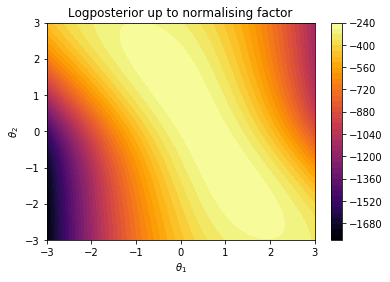

In [9]:
theta1 = np.linspace(-3,3,100)
theta2 = np.linspace(-3,3,100)

Theta1, Theta2 = np.meshgrid(theta1, theta2) 

my_logprior = vprior(Theta1.flatten(), Theta2.flatten())
my_loglik = vlik(Theta1.flatten(), Theta2.flatten())

logposterior = my_logprior + my_loglik # up to the normalization factor

plt.contourf(Theta1, Theta2, logposterior.reshape(100,100), levels=50, cmap="inferno")
plt.colorbar()
plt.title("Logposterior up to normalising factor")
ax = plt.gca()
ax.set_xlabel(r"$\theta_1$")
ax.set_ylabel(r"$\theta_2$")
